In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

In [40]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [232]:
years = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]

In [3]:
data_08 = pd.read_excel('H1B - Data disclosure/H-1B_Case_Data_FY2008.xlsx')

In [4]:
data_08.columns

Index([u'SUBMITTED_DATE', u'CASE_NO', u'PROGRAM', u'NAME', u'ADDRESS1',
       u'ADDRESS2', u'CITY', u'STATE', u'POSTAL_CODE', u'NBR_IMMIGRANTS',
       u'BEGIN_DATE', u'END_DATE', u'JOB_TITLE', u'DOL_DECISION_DATE',
       u'CERTIFIED_BEGIN_DATE', u'CERTIFIED_END_DATE', u'JOB_CODE',
       u'APPROVAL_STATUS', u'WAGE_RATE_1', u'RATE_PER_1', u'MAX_RATE_1',
       u'PART_TIME_1', u'CITY_1', u'STATE_1', u'PREVAILING_WAGE_1',
       u'WAGE_SOURCE_1', u'YR_SOURCE_PUB_1', u'OTHER_WAGE_SOURCE_1',
       u'WAGE_RATE_2', u'RATE_PER_2', u'MAX_RATE_2', u'PART_TIME_2', u'CITY_2',
       u'STATE_2', u'PREVAILING_WAGE_2', u'WAGE_SOURCE_2', u'YR_SOURCE_PUB_2',
       u'OTHER_WAGE_SOURCE_2', u'WITHDRAWN', u'OCCUPATIONAL_TITLE'],
      dtype='object')

In [5]:
data_09 = pd.read_excel('H1B - Data disclosure/H-1B_Case_Data_FY2009.xlsx')

In [6]:
data_09.columns

Index([u'SUBMITTED_DATE', u'CASE_NO', u'PROGRAM_DESIGNATION', u'EMPLOYER_NAME',
       u'EMPLOYER_ADDRESS1', u'EMPLOYER_ADDRESS2', u'EMPLOYER_CITY',
       u'EMPLOYER_STATE', u'EMPLOYER_COUNTY', u'EMPLOYER_POSTAL_CODE',
       u'NBR_IMMIGRANTS', u'BEGIN_DATE', u'END_DATE', u'JOB_TITLE',
       u'DOL_DECISION_DATE', u'OCCUPATIONAL_CODE', u'OCCUPATIONAL_TITLE',
       u'APPROVAL_STATUS', u'WAGE_RATE_1', u'RATE_PER_1', u'MAX_RATE_1',
       u'PART_TIME_1', u'CITY_1', u'STATE_1', u'PREVAILING_WAGE_1',
       u'WAGE_SOURCE_1', u'YR_SOURCE_PUB_1', u'OTHER_WAGE_SOURCE_1',
       u'WAGE_RATE__2', u'RATE_PER_2', u'MAX_RATE_2', u'PART_TIME_2',
       u'CITY_2', u'STATE_2', u'PREVAILING_WAGE_2', u'WAGE_SOURCE_2',
       u'YR_SOURCE_PUB_2', u'OTHER_WAGE_SOURCE_2', u'WITHDRAWN'],
      dtype='object')

In [7]:
data_10 = pd.read_excel('H1B - Data disclosure/H-1B_FY2010.xlsx')

In [8]:
data_10.columns

Index([u'LCA_CASE_NUMBER', u'STATUS', u'LCA_CASE_SUBMIT', u'DECISION_DATE',
       u'LCA_CASE_EMPLOYMENT_START_DATE', u'LCA_CASE_EMPLOYMENT_END_DATE',
       u'LCA_CASE_EMPLOYER_NAME', u'LCA_CASE_EMPLOYER_ADDRESS1',
       u'LCA_CASE_EMPLOYER_ADDRESS2', u'LCA_CASE_EMPLOYER_CITY',
       u'LCA_CASE_EMPLOYER_STATE', u'LCA_CASE_EMPLOYER_POSTAL_CODE',
       u'LCA_CASE_SOC_CODE', u'LCA_CASE_SOC_NAME', u'LCA_CASE_JOB_TITLE',
       u'LCA_CASE_WAGE_RATE_FROM', u'LCA_CASE_WAGE_RATE_TO', u'TOTAL_WORKERS',
       u'WORK_LOCATION_CITY1', u'WORK_LOCATION_STATE1', u'PW_1', u'PW_UNIT_1',
       u'PW_SOURCE_1', u'OTHER_WAGE_SOURCE_1', u'YR_SOURCE_PUB_1',
       u'WORK_LOCATION_CITY2', u'WORK_LOCATION_STATE2', u'PW_2', u'PW_UNIT_2',
       u'PW_SOURCE_2', u'OTHER_WAGE_SOURCE_2', u'YR_SOURCE_PUB_2',
       u'LCA_CASE_NAICS_CODE'],
      dtype='object')

In [9]:
data_11 = pd.read_excel('H1B - Data disclosure/H-1B_iCert_LCA_FY2011_Q4.xlsx')

In [10]:
data_11.columns

Index([u'LCA_CASE_NUMBER', u'STATUS', u'LCA_CASE_SUBMIT', u'DECISION_DATE',
       u'VISA_CLASS', u'LCA_CASE_EMPLOYMENT_START_DATE',
       u'LCA_CASE_EMPLOYMENT_END_DATE', u'LCA_CASE_EMPLOYER_NAME',
       u'LCA_CASE_EMPLOYER_ADDRESS', u'LCA_CASE_EMPLOYER_CITY',
       u'LCA_CASE_EMPLOYER_STATE', u'LCA_CASE_EMPLOYER_POSTAL_CODE',
       u'LCA_CASE_SOC_CODE', u'LCA_CASE_SOC_NAME', u'LCA_CASE_JOB_TITLE',
       u'LCA_CASE_WAGE_RATE_FROM', u'LCA_CASE_WAGE_RATE_TO',
       u'LCA_CASE_WAGE_RATE_UNIT', u'FULL_TIME_POS', u'TOTAL_WORKERS',
       u'LCA_CASE_WORKLOC1_CITY', u'LCA_CASE_WORKLOC1_STATE', u'PW_1',
       u'PW_UNIT_1', u'PW_SOURCE_1', u'OTHER_WAGE_SOURCE_1',
       u'YR_SOURCE_PUB_1', u'LCA_CASE_WORKLOC2_CITY',
       u'LCA_CASE_WORKLOC2_STATE', u'PW_2', u'PW_UNIT_2', u'PW_SOURCE_2',
       u'OTHER_WAGE_SOURCE_2', u'YR_SOURCE_PUB_2', u'LCA_CASE_NAICS_CODE'],
      dtype='object')

In [11]:
data_12 = pd.read_excel('H1B - Data disclosure/LCA_FY2012_Q4.xlsx')

In [12]:
data_12.columns

Index([u'LCA_CASE_NUMBER', u'STATUS', u'LCA_CASE_SUBMIT', u'DECISION_DATE',
       u'VISA_CLASS', u'LCA_CASE_EMPLOYMENT_START_DATE',
       u'LCA_CASE_EMPLOYMENT_END_DATE', u'LCA_CASE_EMPLOYER_NAME',
       u'LCA_CASE_EMPLOYER_ADDRESS', u'LCA_CASE_EMPLOYER_CITY',
       u'LCA_CASE_EMPLOYER_STATE', u'LCA_CASE_EMPLOYER_POSTAL_CODE',
       u'LCA_CASE_SOC_CODE', u'LCA_CASE_SOC_NAME', u'LCA_CASE_JOB_TITLE',
       u'LCA_CASE_WAGE_RATE_FROM', u'LCA_CASE_WAGE_RATE_TO',
       u'LCA_CASE_WAGE_RATE_UNIT', u'FULL_TIME_POS', u'TOTAL_WORKERS',
       u'LCA_CASE_WORKLOC1_CITY', u'LCA_CASE_WORKLOC1_STATE', u'PW_1',
       u'PW_UNIT_1', u'PW_SOURCE_1', u'OTHER_WAGE_SOURCE_1',
       u'YR_SOURCE_PUB_1', u'LCA_CASE_WORKLOC2_CITY',
       u'LCA_CASE_WORKLOC2_STATE', u'PW_2', u'PW_UNIT_2', u'PW_SOURCE_2',
       u'OTHER_WAGE_SOURCE_2', u'YR_SOURCE_PUB_2', u'LCA_CASE_NAICS_CODE'],
      dtype='object')

In [13]:
data_13 = pd.read_excel('H1B - Data disclosure/LCA_FY2013.xlsx')

In [15]:
data_13.columns

Index([u'LCA_CASE_NUMBER', u'STATUS', u'LCA_CASE_SUBMIT', u'Decision_Date',
       u'VISA_CLASS', u'LCA_CASE_EMPLOYMENT_START_DATE',
       u'LCA_CASE_EMPLOYMENT_END_DATE', u'LCA_CASE_EMPLOYER_NAME',
       u'LCA_CASE_EMPLOYER_ADDRESS', u'LCA_CASE_EMPLOYER_CITY',
       u'LCA_CASE_EMPLOYER_STATE', u'LCA_CASE_EMPLOYER_POSTAL_CODE',
       u'LCA_CASE_SOC_CODE', u'LCA_CASE_SOC_NAME', u'LCA_CASE_JOB_TITLE',
       u'LCA_CASE_WAGE_RATE_FROM', u'LCA_CASE_WAGE_RATE_TO',
       u'LCA_CASE_WAGE_RATE_UNIT', u'FULL_TIME_POS', u'TOTAL_WORKERS',
       u'LCA_CASE_WORKLOC1_CITY', u'LCA_CASE_WORKLOC1_STATE', u'PW_1',
       u'PW_UNIT_1', u'PW_SOURCE_1', u'OTHER_WAGE_SOURCE_1',
       u'YR_SOURCE_PUB_1', u'LCA_CASE_WORKLOC2_CITY',
       u'LCA_CASE_WORKLOC2_STATE', u'PW_2', u'PW_UNIT_2', u'PW_SOURCE_2',
       u'OTHER_WAGE_SOURCE_2', u'YR_SOURCE_PUB_2', u'LCA_CASE_NAICS_CODE'],
      dtype='object')

In [16]:
data_14 = pd.read_excel('H1B - Data disclosure/H-1B_FY14_Q4.xlsx')

In [17]:
data_14.columns

Index([u'LCA_CASE_NUMBER', u'STATUS', u'LCA_CASE_SUBMIT', u'DECISION_DATE',
       u'VISA_CLASS', u'LCA_CASE_EMPLOYMENT_START_DATE',
       u'LCA_CASE_EMPLOYMENT_END_DATE', u'LCA_CASE_EMPLOYER_NAME',
       u'LCA_CASE_EMPLOYER_ADDRESS', u'LCA_CASE_EMPLOYER_CITY',
       u'LCA_CASE_EMPLOYER_STATE', u'LCA_CASE_EMPLOYER_POSTAL_CODE',
       u'LCA_CASE_SOC_CODE', u'LCA_CASE_SOC_NAME', u'LCA_CASE_JOB_TITLE',
       u'LCA_CASE_WAGE_RATE_FROM', u'LCA_CASE_WAGE_RATE_TO',
       u'LCA_CASE_WAGE_RATE_UNIT', u'FULL_TIME_POS', u'TOTAL_WORKERS',
       u'LCA_CASE_WORKLOC1_CITY', u'LCA_CASE_WORKLOC1_STATE', u'PW_1',
       u'PW_UNIT_1', u'PW_SOURCE_1', u'OTHER_WAGE_SOURCE_1',
       u'YR_SOURCE_PUB_1', u'LCA_CASE_WORKLOC2_CITY',
       u'LCA_CASE_WORKLOC2_STATE', u'PW_2', u'PW_UNIT_2', u'PW_SOURCE_2',
       u'OTHER_WAGE_SOURCE_2', u'YR_SOURCE_PUB_2', u'LCA_CASE_NAICS_CODE'],
      dtype='object')

In [18]:
data_15 = pd.read_excel('H1B - Data disclosure/H-1B_Disclosure_Data_FY15_Q4.xlsx')

In [19]:
data_15.columns

Index([u'CASE_NUMBER', u'CASE_STATUS', u'CASE_SUBMITTED', u'DECISION_DATE',
       u'VISA_CLASS', u'EMPLOYMENT_START_DATE', u'EMPLOYMENT_END_DATE',
       u'EMPLOYER_NAME', u'EMPLOYER_ADDRESS1', u'EMPLOYER_ADDRESS2',
       u'EMPLOYER_CITY', u'EMPLOYER_STATE', u'EMPLOYER_POSTAL_CODE',
       u'EMPLOYER_COUNTRY', u'EMPLOYER_PROVINCE', u'EMPLOYER_PHONE',
       u'EMPLOYER_PHONE_EXT', u'AGENT_ATTORNEY_NAME', u'AGENT_ATTORNEY_CITY',
       u'AGENT_ATTORNEY_STATE', u'JOB_TITLE', u'SOC_CODE', u'SOC_NAME',
       u'NAIC_CODE', u'TOTAL WORKERS', u'FULL_TIME_POSITION',
       u'PREVAILING_WAGE', u'PW_UNIT_OF_PAY', u'PW_WAGE_LEVEL',
       u'PW_WAGE_SOURCE', u'PW_WAGE_SOURCE_YEAR', u'PW_WAGE_SOURCE_OTHER',
       u'WAGE_RATE_OF_PAY', u'WAGE_UNIT_OF_PAY', u'H-1B_DEPENDENT',
       u'WILLFUL VIOLATOR', u'WORKSITE_CITY', u'WORKSITE_COUNTY',
       u'WORKSITE_STATE', u'WORKSITE_POSTAL_CODE'],
      dtype='object')

In [20]:
data_16 = pd.read_excel('H1B - Data disclosure/H-1B_Disclosure_Data_FY16.xlsx')

In [21]:
data_16.columns

Index([u'CASE_NUMBER', u'CASE_STATUS', u'CASE_SUBMITTED', u'DECISION_DATE',
       u'VISA_CLASS', u'EMPLOYMENT_START_DATE', u'EMPLOYMENT_END_DATE',
       u'EMPLOYER_NAME', u'EMPLOYER_ADDRESS', u'EMPLOYER_CITY',
       u'EMPLOYER_STATE', u'EMPLOYER_POSTAL_CODE', u'EMPLOYER_COUNTRY',
       u'EMPLOYER_PROVINCE', u'EMPLOYER_PHONE', u'EMPLOYER_PHONE_EXT',
       u'AGENT_ATTORNEY_NAME', u'AGENT_ATTORNEY_CITY', u'AGENT_ATTORNEY_STATE',
       u'JOB_TITLE', u'SOC_CODE', u'SOC_NAME', u'NAIC_CODE', u'TOTAL_WORKERS',
       u'FULL_TIME_POSITION', u'PREVAILING_WAGE', u'PW_UNIT_OF_PAY',
       u'PW_WAGE_SOURCE', u'PW_SOURCE_YEAR', u'PW_SOURCE_OTHER',
       u'WAGE_RATE_OF_PAY_FROM', u'WAGE_RATE_OF_PAY_TO', u'WAGE_UNIT_OF_PAY',
       u'H-1B_DEPENDENT', u'WILLFUL_VIOLATOR', u'WORKSITE_CITY',
       u'WORKSITE_COUNTY', u'WORKSITE_STATE', u'WORKSITE_POSTAL_CODE',
       u'ORIGINAL_CERT_DATE'],
      dtype='object')

In [138]:
data_17 = pd.read_excel('H1B - Data disclosure/H-1B_Disclosure_Data_FY17.xlsx')

In [139]:
data_17.columns

Index([u'CASE_NUMBER', u'CASE_STATUS', u'CASE_SUBMITTED', u'DECISION_DATE',
       u'VISA_CLASS', u'EMPLOYMENT_START_DATE', u'EMPLOYMENT_END_DATE',
       u'EMPLOYER_NAME', u'EMPLOYER_ADDRESS', u'EMPLOYER_CITY',
       u'EMPLOYER_STATE', u'EMPLOYER_POSTAL_CODE', u'EMPLOYER_COUNTRY',
       u'EMPLOYER_PROVINCE', u'EMPLOYER_PHONE', u'EMPLOYER_PHONE_EXT',
       u'AGENT_ATTORNEY_NAME', u'AGENT_ATTORNEY_CITY', u'AGENT_ATTORNEY_STATE',
       u'JOB_TITLE', u'SOC_CODE', u'SOC_NAME', u'NAICS_CODE', u'TOTAL_WORKERS',
       u'FULL_TIME_POSITION', u'PREVAILING_WAGE', u'PW_UNIT_OF_PAY',
       u'PW_SOURCE', u'PW_SOURCE_YEAR', u'PW_SOURCE_OTHER',
       u'WAGE_RATE_OF_PAY_FROM', u'WAGE_RATE_OF_PAY_TO', u'WAGE_UNIT_OF_PAY',
       u'H1B_DEPENDENT', u'WILLFUL_VIOLATOR', u'WORKSITE_CITY',
       u'WORKSITE_COUNTY', u'WORKSITE_STATE', u'WORKSITE_POSTAL_CODE',
       u'ORIGINAL_CERT_DATE'],
      dtype='object')

### Decision Time 

In [212]:
def get_decision_times_for_year(decision_times):
    decision_days = np.array(map(lambda x: x.days ,decision_times))
    return decision_days[(decision_days<=31) & (decision_days >0)]

#### Generate decision times

In [143]:
decision_times_08 = data_08['DOL_DECISION_DATE'] - data_08['SUBMITTED_DATE']
decision_times_09 = data_09['DOL_DECISION_DATE'] - data_09['SUBMITTED_DATE']
decision_times_10 = data_10['DECISION_DATE'] - data_10['LCA_CASE_SUBMIT']

In [140]:
decision_times_11 = data_11['DECISION_DATE'] - data_11['LCA_CASE_SUBMIT']
decision_times_12 = data_12['DECISION_DATE'] - data_12['LCA_CASE_SUBMIT']
decision_times_13 = data_13['Decision_Date'] - data_13['LCA_CASE_SUBMIT']
decision_times_14 = data_14['DECISION_DATE'] - data_14['LCA_CASE_SUBMIT']
decision_times_15 = data_15['DECISION_DATE'] - data_15['CASE_SUBMITTED']
decision_times_16 = data_16['DECISION_DATE'] - data_16['CASE_SUBMITTED']
decision_times_17 = data_17['DECISION_DATE'] - data_17['CASE_SUBMITTED']

In [213]:
decision_days_08_month = get_decision_times_for_year(decision_times_08)

In [214]:
decision_days_09_month = get_decision_times_for_year(decision_times_09)

In [215]:
decision_days_10_month = get_decision_times_for_year(decision_times_10)

In [216]:
decision_days_11_month = get_decision_times_for_year(decision_times_11)

In [217]:
decision_days_12_month = get_decision_times_for_year(decision_times_12)

In [218]:
decision_days_13_month = get_decision_times_for_year(decision_times_13)

In [219]:
decision_days_14_month = get_decision_times_for_year(decision_times_14)

In [220]:
decision_days_15_month = get_decision_times_for_year(decision_times_15)

In [221]:
decision_days_16_month = get_decision_times_for_year(decision_times_16)

In [222]:
decision_days_17_month = get_decision_times_for_year(decision_times_17)

In [242]:
means = [(np.mean(decision_days_08_month), len(data_08)),
         (np.mean(decision_days_09_month), len(data_09)),
         (np.mean(decision_days_10_month), len(data_10)),
         (np.mean(decision_days_11_month), len(data_11)),
         (np.mean(decision_days_12_month),len(data_12)),
         (np.mean(decision_days_13_month),len(data_13)),
         (np.mean(decision_days_14_month),len(data_14)),
         (np.mean(decision_days_15_month),len(data_15)),
         (np.mean(decision_days_16_month),len(data_16)),
         (np.mean(decision_days_17_month),len(data_17))]

In [243]:
np.array(means)

array([[  3.82200957e+00,   4.05641000e+05],
       [  4.31360947e+00,   2.68243000e+05],
       [  5.70135105e+00,   3.42575000e+05],
       [  5.73289696e+00,   3.58857000e+05],
       [  5.73545591e+00,   4.15845000e+05],
       [  5.86452110e+00,   4.42275000e+05],
       [  6.26358707e+00,   5.19504000e+05],
       [  6.06608301e+00,   6.18804000e+05],
       [  5.77348817e+00,   6.47852000e+05],
       [  5.74545890e+00,   4.20436000e+05]])

In [244]:
means_list = [mean[0] for mean in means]
total = [mean[1] for mean in means]

In [253]:
plt.plot(years,means_list)

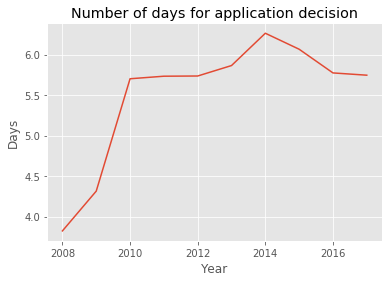

In [254]:
plt.xlabel('Year')
plt.ylabel('Days')
plt.title('Number of days for application decision')
plt.show()

## Distribution Analysis for decision times

In [509]:
binwidth = 1
def add_sub_plot(decision_days, rows,cols,index ,year):
    bins=np.arange(min(decision_days), max(decision_days) + binwidth, binwidth)
    plt.subplot(rows,cols,index)
    plt.hist(decision_days,bins,normed=True, facecolor='green')
    mu = np.mean(decision_days)
    var = np.var(decision_days)
    
    plt.plot(bins,mlab.normpdf(bins, mu, math.sqrt(var)),color='red')
    plt.plot(bins,mlab.normpdf(bins, mu, 1),color='blue')
    ks_result = stats.kstest(decision_days, 'norm')
    title = year +  r'  $\mu = {0}  \sigma^2={1}$'.format(np.round(mu,2),np.round(var,2)) + 'ks test {0}'.format(ks_result)
    plt.title(title)
    plt.xlabel('Number of Days')
    plt.ylabel('Frequency')

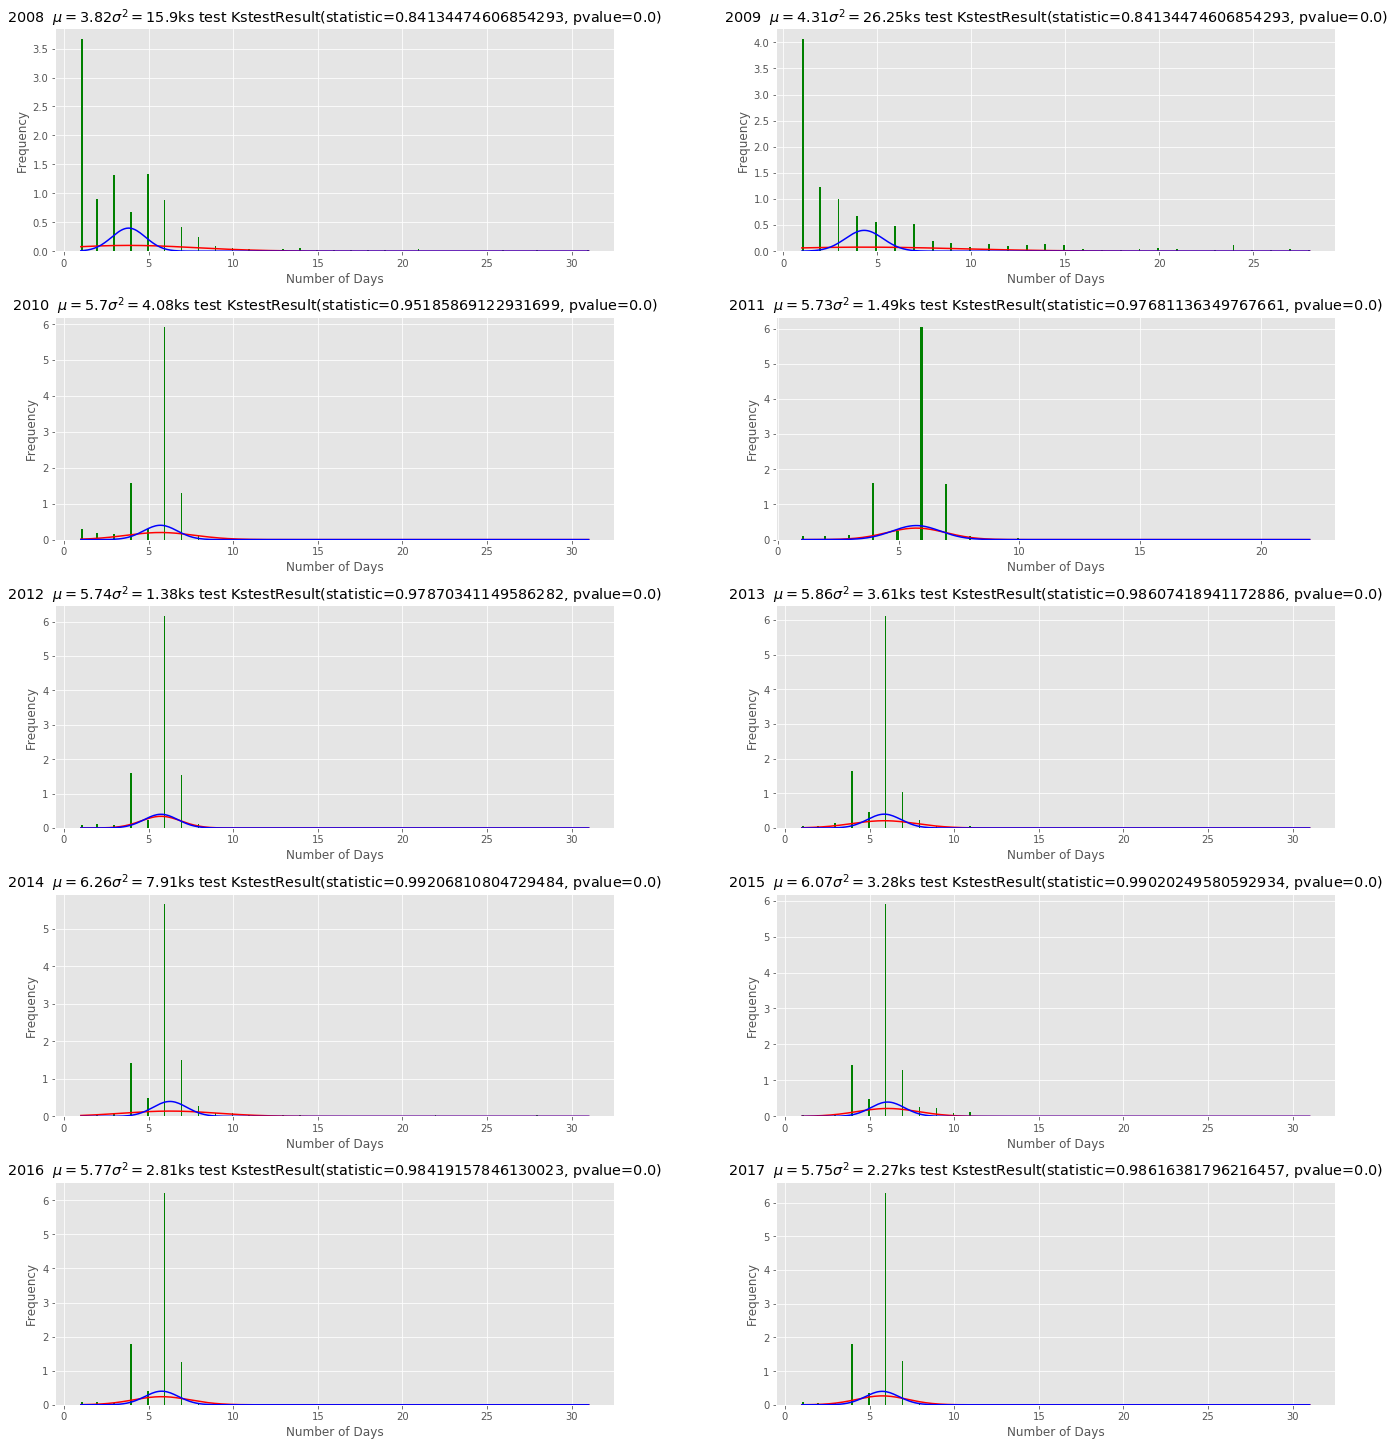

In [510]:
fig = plt.figure(figsize=(20,20))
add_sub_plot(decision_days_08_month,5,2,1,'2008')
add_sub_plot(decision_days_09_month,5,2,2,'2009')
add_sub_plot(decision_days_10_month,5,2,3,'2010')
add_sub_plot(decision_days_11_month,5,2,4,'2011')
add_sub_plot(decision_days_12_month,5,2,5,'2012')
add_sub_plot(decision_days_13_month,5,2,6,'2013')
add_sub_plot(decision_days_14_month,5,2,7,'2014')
add_sub_plot(decision_days_15_month,5,2,8,'2015')
add_sub_plot(decision_days_16_month,5,2,9,'2016')
add_sub_plot(decision_days_17_month,5,2,10,'2017')
plt.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.show()

In [274]:
decision_days_08_month_without_filter

array([0, 0, 0, ..., 0, 0, 0])

In [381]:
np.var(decision_days_12_month_without_filter)

11961.005485409623

In [383]:
math.sqrt(11961.005485409623)

109.36638187948627

In [391]:
len(decision_days_12_month_without_filter[decision_days_12_month_without_filter>31])

16209

## Applicants Analysis

In [250]:
plt.plot(years, total,'-')
plt.xlabel('Year')
plt.ylabel('Number of applicants')

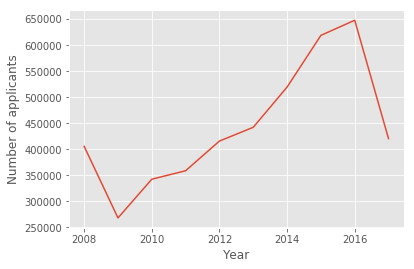

In [251]:
plt.show()

## Applicant Decision Analysis

#### Application Status over years

In [ ]:
decision_columns = ['APPROVAL_STATUS','CITY', u'STATE']

In [481]:
decisions_jobtitle_08 = data_08[['APPROVAL_STATUS','JOB_TITLE']]

In [499]:
decisions_job_group_08 = decisions_jobtitle_08.groupby(['APPROVAL_STATUS','JOB_TITLE'])

In [500]:
decisions_job_group_08.count()

Empty DataFrame
Columns: []
Index: [(CERTIFIED, 1), (CERTIFIED, 2), (CERTIFIED, 30), (CERTIFIED, 70), (CERTIFIED, 99), (CERTIFIED, 56456), (CERTIFIED, 423940), (CERTIFIED, 541511), (CERTIFIED, 621340), (CERTIFIED, 722110), (CERTIFIED, 21201100), (CERTIFIED, 45764576), (CERTIFIED, 436436346), (CERTIFIED,   ACCOUNTANT ), (CERTIFIED,   DIRECTOR OF INSTITUTIONAL EFECTIVENESS & ASSESSM), (CERTIFIED,   PRINCIPAL INVESTIGATOR), (CERTIFIED,   PROGRAM MANAGER II), (CERTIFIED,   TEACHER, SPECIAL EDUCATION), (CERTIFIED,  ACCOUNTANT), (CERTIFIED,  ACTUARIAL CONSULTANT), (CERTIFIED,  ADMISSIONS COUNSELOR FOR INTERNATIONAL STUDENTS), (CERTIFIED,  ANALYST), (CERTIFIED,  ANALYST-BUSINESS MANAGEMENT), (CERTIFIED,  APPLICATION DEVELOPER / PROGRAMMER ANALYST), (CERTIFIED,  APPLICATIONS PROGRAMER ), (CERTIFIED,  ASIAN MARKET DEVELOPMENT SPECIALIST), (CERTIFIED,  ASSISTANT ACTUARY -  MODELING), (CERTIFIED,  ASSISTANT PROFESSOR), (CERTIFIED,  ASSISTANT PROFESSOR ), (CERTIFIED,  ASSISTANT PROFESSOR  CANCER BIOLOGY), (CERTIFIED,  ASSISTANT PROFESSOR MICROBIOLOGY & IMMUNOLOGY), (CERTIFIED,  ASSISTANT PROFESSOR OF NEUROLOGY), (CERTIFIED,  ASSOCIATE DIRECTOR, RESEARCH), (CERTIFIED,  ASSOCIATE TECHNICAL ACCOUNT MANAGER), (CERTIFIED,  BUSINESS ANALYST), (CERTIFIED,  BUSINESS ANALYST, ADVISOR & PLANNER), (CERTIFIED,  BUSINESS DEVELOPMENT DIRECTOR), (CERTIFIED,  BUSINESS FINANCIAL ANAYST), (CERTIFIED,  BUSINESS MANAGEMENT ANALYST), (CERTIFIED,  BUSINESS SYSTEMS ANALYST), (CERTIFIED,  CALC ENGINE SYSTEMS ANALYST), (CERTIFIED,  CHIEF FINANCIAL OFFICER), (CERTIFIED,  CLINICAL ASSISTANT INSTRUCTOR/MEDICAL RESIDENT), (CERTIFIED,  COLLEGE SCIENCE PROFESSOR ), (CERTIFIED,  COMMUNICATIONS MANAGER), (CERTIFIED,  COMPUTER AND INFORMATION SYSTEMS MANAGER), (CERTIFIED,  COMPUTER PROGRAMER ), (CERTIFIED,  COMPUTER PROGRAMMER), (CERTIFIED,  COMPUTER SYSTEMS ANALYST), (CERTIFIED,  CONSULTANT), (CERTIFIED,  CONSULTANT 2), (CERTIFIED,  COUNSELOR), (CERTIFIED,  CURATORIAL ASSISTANT, CONTEMPORARY ART), (CERTIFIED,  DATA  ANALYST), (CERTIFIED,  DATABASE  ANALYST), (CERTIFIED,  DESIGN ENGINEER), (CERTIFIED,  DESIGNER), (CERTIFIED,  DIRECTOR OF MARKETING AND DISTRIBUTION), (CERTIFIED,  DIRECTOR, PRODUCTION), (CERTIFIED,  DIRECTOR, RESEARCH), (CERTIFIED,  EARLY CHILDHOOD TEACHER), (CERTIFIED,  EDUCATION AND IN-SERVICE  COORDINATOR), (CERTIFIED,  ENGINEER), (CERTIFIED,  ESCALATION ENGINEER ), (CERTIFIED,  FASHION DESIGNER), (CERTIFIED,  FIELD OPERATIONS MANAGER), (CERTIFIED,  FINANCIAL ANALYST), (CERTIFIED,  FRONT OFFICE MANAGER), (CERTIFIED,  FUNCTIONAL CONSULTANT), (CERTIFIED,  GENERAL MANAGER ), (CERTIFIED,  GLOBAL IMPORT & ACCOUNT SPECIALIST), (CERTIFIED,  GUEST SERVICES ASSISTANT MANAGER), (CERTIFIED,  HIGH FASHION MODEL), (CERTIFIED,  INDUSTRIAL DESIGNER    ), (CERTIFIED,  INSTRUCTOR/COACH), (CERTIFIED,  INSTRUMENTAL AND CONTROL DESIGNER), (CERTIFIED,  IT OPERATIONS PROGRAM MANAGER  ), (CERTIFIED,  IT SOFTWARE DEVELOPMENT ENGINEER), (CERTIFIED,  JAVA DEVELOPER), (CERTIFIED,  JOB: CONSULTANT, BUSINESS PROCESS / MANAGEMENT ), (CERTIFIED,  LEAD SOFTWARE DEVELOPMENT ENGINEER IN TEST), (CERTIFIED,  LEAD TEACHER ASST ENGLISH LANG. LEARNERS (ELL)), (CERTIFIED,  MANAGER AND HOUSE KEEPER - COOK- IN RECTORY), (CERTIFIED,  MANAGER OF FOREIGN PUBLIC RELATIONS), (CERTIFIED,  MANAGER, BUSINESS ADMINISTRATION & DEVELOPMENT), (CERTIFIED,  MANAGER, ENVIRONMENTAL RESEARCH), (CERTIFIED,  MANAGER- ASSURANCE STANDARD SERVICES), (CERTIFIED,  MATH TEACHER), (CERTIFIED,  MEDIA METHODS/MARKET RESEARCH ANALYST), (CERTIFIED,  MEDICAL TECHNOLOGIST), (CERTIFIED,  MEMBER OF TECHNICAL STAFF, SOFTWARE DEVELOPER ), (CERTIFIED,  MENTAL HEALTH COUNSELOR), (CERTIFIED,  MTS SOFTWARE ENGINEER), (CERTIFIED,  NEPHROLOGIST), (CERTIFIED,  NETWORK AND COMPUTER SYSTEMS ADMINISTRATOR), (CERTIFIED,  NUMERICAL TOOL AND PROCESS CONTROL PROGRAMMER), (CERTIFIED,  OCCUPATIONAL THERAPIST), (CERTIFIED,  OTHER OCCUPATIONS IN WRITING), (CERTIFIED,  PHARMACOKINETICIST II), (CERTIFIED,  PHYSICIAN PGY5 FELLOW), ...]

[63748 rows x 

In [136]:
data_08['APPROVAL_STATUS'].unique()

array([u'CERTIFIED', u'DENIED'], dtype=object)

In [137]:
data_09['APPROVAL_STATUS'].unique()

array([u'CERTIFIED', u'DENIED'], dtype=object)

In [138]:
data_10['STATUS'].unique()

array([u'CERTIFIED-WITHDRAWN', u'CERTIFIED', u'WITHDRAWN', u'DENIED'], dtype=object)

In [42]:
decision_days = np.array(map(lambda x: x.days ,decision_times))
decision_days_less_than_a_month = decision_days[decision_days<=31]

In [48]:
plt.hist(decision_days, np.arange(31,max(decision_days), 50))
plt.show()

In [31]:
np.mean(decision_days)

36.918586852071677

In [46]:
len(decision_days) - len(decision_days_less_than_a_month)

31008

In [10]:
len(data_13[u'LCA_CASE_SOC_CODE'].unique())

1116

In [ ]:
data_13[[u'LCA_CASE_EMPLOYMENT_START_DATE',u'LCA_CASE_EMPLOYMENT_END_DATE']]

In [16]:
visa_class = data_13.groupby(['VISA_CLASS'])

In [25]:
visa_class.count()

,LCA_CASE_NUMBER,STATUS,LCA_CASE_SUBMIT,Decision_Date,LCA_CASE_EMPLOYMENT_START_DATE,LCA_CASE_EMPLOYMENT_END_DATE,LCA_CASE_EMPLOYER_NAME,LCA_CASE_EMPLOYER_ADDRESS,LCA_CASE_EMPLOYER_CITY,LCA_CASE_EMPLOYER_STATE,...,OTHER_WAGE_SOURCE_1,YR_SOURCE_PUB_1,LCA_CASE_WORKLOC2_CITY,LCA_CASE_WORKLOC2_STATE,PW_2,PW_UNIT_2,PW_SOURCE_2,OTHER_WAGE_SOURCE_2,YR_SOURCE_PUB_2,LCA_CASE_NAICS_CODE
VISA_CLASS,,,,,,,,,,,,,,,,,,,,,
E-3 Australian,7707,7707,7707,7707,7707,7707,7707,7707,7706,7704,...,7246,7697,431,431,430,430,430,408,430,7707
H-1B,433604,433604,433604,433604,433489,433489,433489,433486,433486,433479,...,421901,433454,65375,65392,65389,65390,65397,64342,65388,433488
H-1B1 Chile,442,442,442,442,442,442,442,442,442,442,...,420,441,30,30,30,30,30,29,30,442
H-1B1 Singapore,520,520,520,520,520,520,520,520,520,519,...,505,520,33,33,33,33,33,33,33,520
Select Visa Classification,2,2,2,2,0,0,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1


In [29]:
data_13.loc[data_13['VISA_CLASS']=='E-3 Australian']

7707

In [38]:
len(data_13['LCA_CASE_JOB_TITLE'].unique())

68197

In [39]:
job_title = data_13.groupby(['LCA_CASE_JOB_TITLE'])

In [41]:
job_title.count().sort_values('LCA_CASE_NUMBER')

,LCA_CASE_NUMBER,STATUS,LCA_CASE_SUBMIT,Decision_Date,VISA_CLASS,LCA_CASE_EMPLOYMENT_START_DATE,LCA_CASE_EMPLOYMENT_END_DATE,LCA_CASE_EMPLOYER_NAME,LCA_CASE_EMPLOYER_ADDRESS,LCA_CASE_EMPLOYER_CITY,...,OTHER_WAGE_SOURCE_1,YR_SOURCE_PUB_1,LCA_CASE_WORKLOC2_CITY,LCA_CASE_WORKLOC2_STATE,PW_2,PW_UNIT_2,PW_SOURCE_2,OTHER_WAGE_SOURCE_2,YR_SOURCE_PUB_2,LCA_CASE_NAICS_CODE
LCA_CASE_JOB_TITLE,,,,,,,,,,,,,,,,,,,,,
"""TEST"" SENIOR SCIENTIST",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, EXECUTIVE DEVELOPMENT",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, FLASH",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, FOAM & TRIM BUSINESS UNIT",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, GROUP RISK",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, HOSPITALITY SOLUTIONS",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, INT'L MINISTRIES/EXECUTIVE SECRET",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"PROGRAM MANAGER, ISSLP LAT. AMERICA/COMMUNITY BASE",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
"PROGRAM MANAGER, MALARIA",1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1


## Top H1-B Filings by Employers

In [128]:
fig = plt.figure(figsize=(20, 50))

plt.subplot(421)
data_09['EMPLOYER_NAME'].value_counts().nlargest(20).plot(kind="bar", color = tableau20)
plt.title('2009')

In [129]:
plt.subplot(422)
data_10['LCA_CASE_EMPLOYER_NAME'].value_counts().nlargest(20).plot(kind="bar", color = tableau20)
plt.title('2010')

In [130]:
plt.subplot(423)
data_11['LCA_CASE_EMPLOYER_NAME'].value_counts().nlargest(20).plot(kind="bar", color = tableau20)
plt.title('2011')

In [131]:
plt.subplot(424)
data_12['LCA_CASE_EMPLOYER_NAME'].value_counts().nlargest(20).plot(kind="bar", color = tableau20)
plt.title('2012')

In [132]:
plt.subplot(425)
data_13['LCA_CASE_EMPLOYER_NAME'].value_counts().nlargest(20).plot(kind="bar", color = tableau20)
plt.title('2013')

In [133]:
plt.subplot(426)
data_14['LCA_CASE_EMPLOYER_NAME'].value_counts().nlargest(20).plot(kind="bar", color = tableau20)
plt.title('2014')

In [134]:
plt.subplot(427)
data_15['EMPLOYER_NAME'].value_counts().nlargest(20).plot(kind="bar", color = tableau20)
plt.title('2015')

In [135]:
plt.subplot(428)
data_16['EMPLOYER_NAME'].value_counts().nlargest(20).plot(kind="bar", color = tableau20)
plt.title('2016')

In [136]:
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.title('Top 20 Employers filing H1-B (2009-2016)')
plt.show()

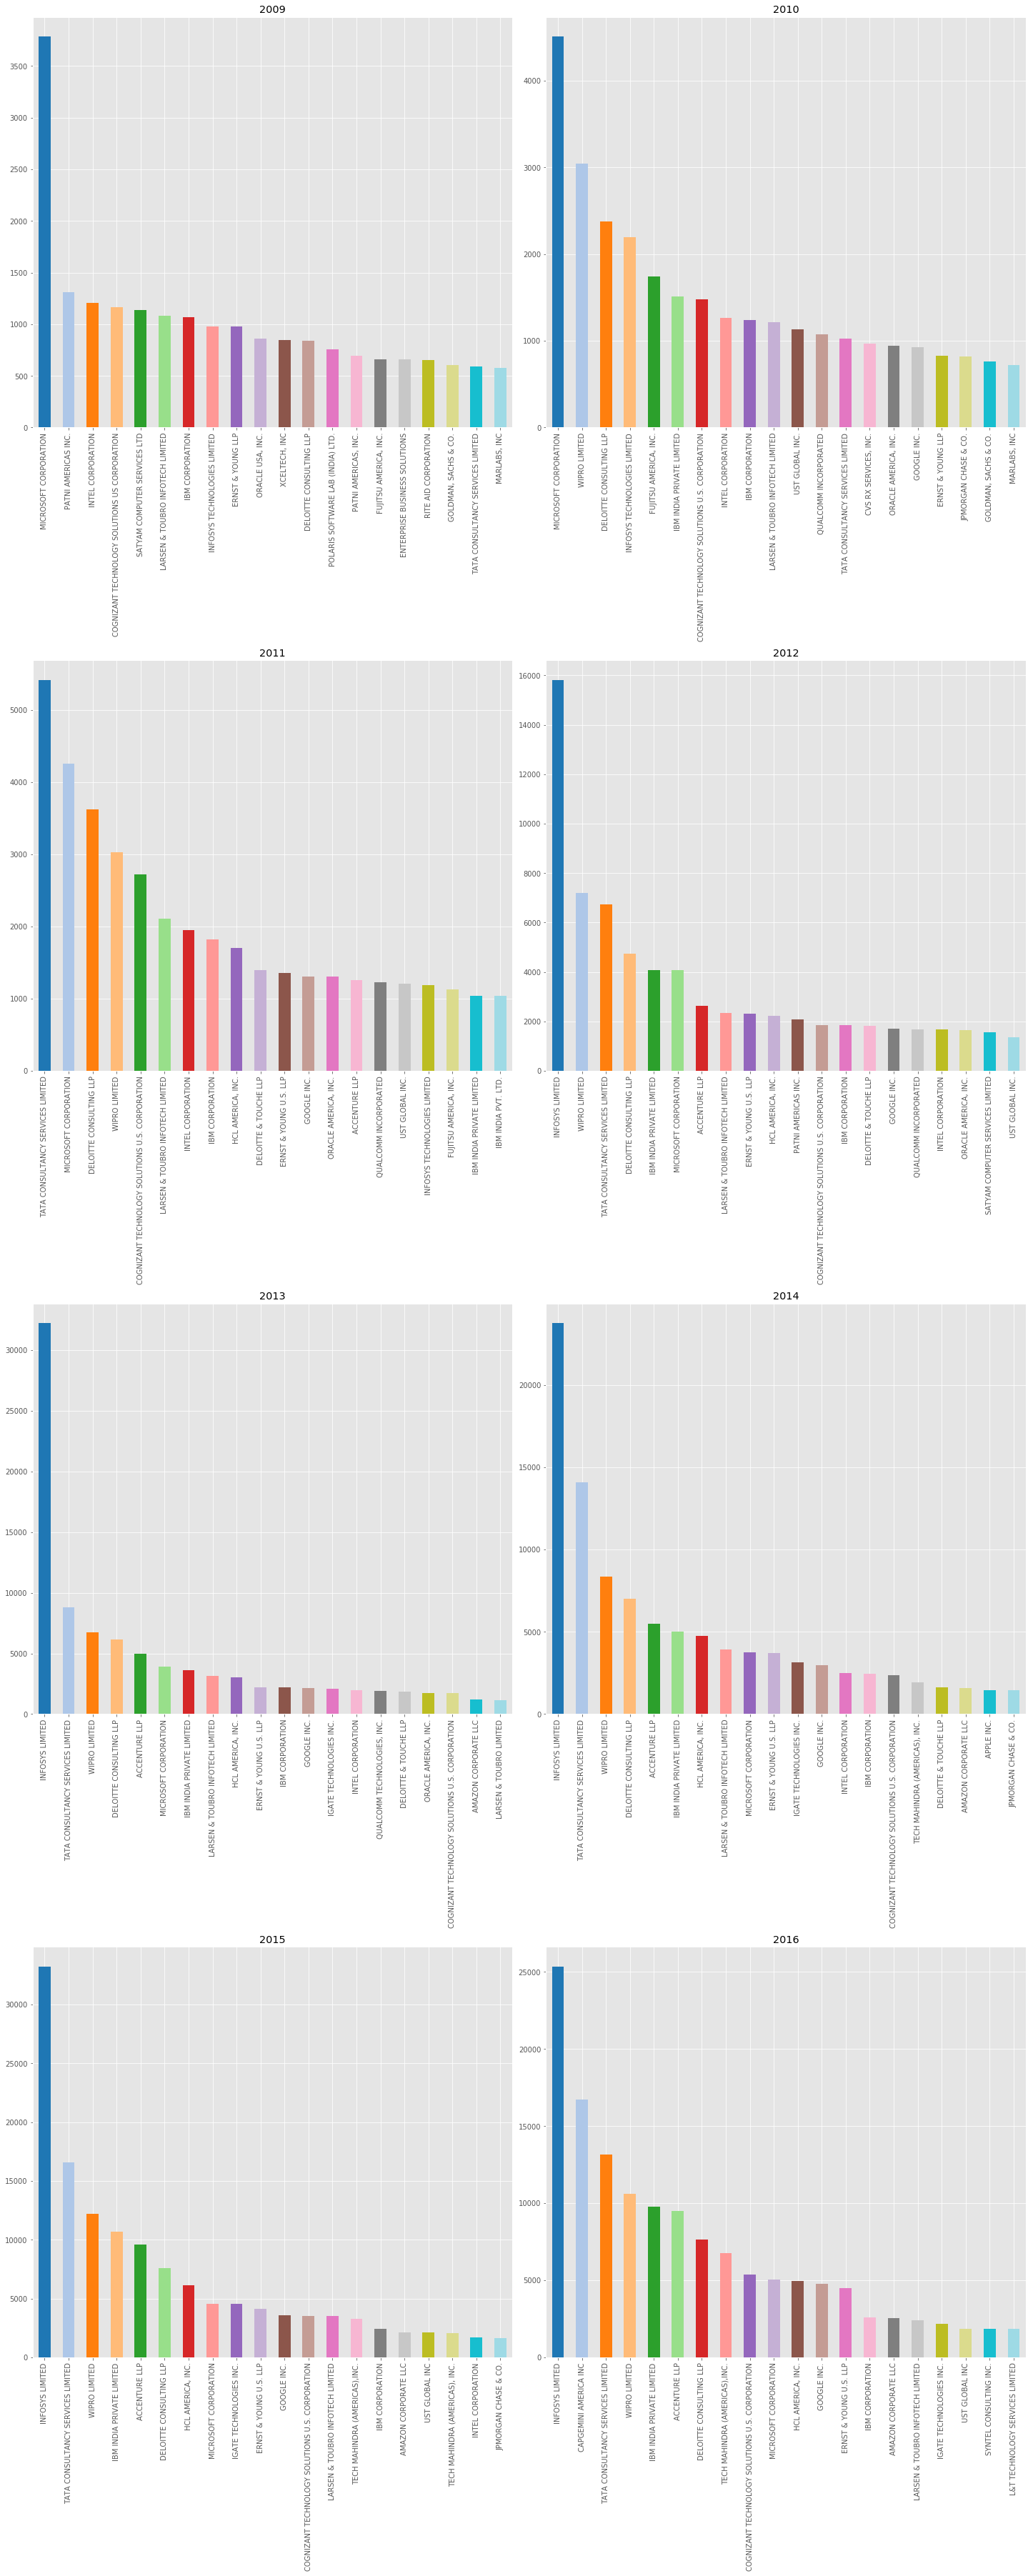

## Top H1-B Filings by Job Type

In [432]:
jobTitles = data_08['JOB_TITLE'].value_counts().nlargest(20).plot(kind="bar",color=tableau20)

In [437]:
top_job_titles_08 = data_08['JOB_TITLE'].value_counts().nlargest(20)
top_job_titles_09 = data_09['JOB_TITLE'].value_counts().nlargest(20)
top_job_titles_10 = data_10['LCA_CASE_JOB_TITLE'].value_counts().nlargest(20)
top_job_titles_11 = data_11['LCA_CASE_JOB_TITLE'].value_counts().nlargest(20)
top_job_titles_12 = data_12['LCA_CASE_JOB_TITLE'].value_counts().nlargest(20)
top_job_titles_13 = data_13['LCA_CASE_JOB_TITLE'].value_counts().nlargest(20)
top_job_titles_14 = data_14['LCA_CASE_JOB_TITLE'].value_counts().nlargest(20)
top_job_titles_15 = data_15['JOB_TITLE'].value_counts().nlargest(20)
top_job_titles_16 = data_16['JOB_TITLE'].value_counts().nlargest(20)
top_job_titles_17 = data_17['JOB_TITLE'].value_counts().nlargest(20)

In [456]:
top_titles = set()
top_titles |= set(list(top_job_titles_08.index))
top_titles |= set(list(top_job_titles_09.index))
top_titles |= set(list(top_job_titles_10.index))
top_titles |= set(list(top_job_titles_11.index))
top_titles |= set(list(top_job_titles_12.index))
top_titles |= set(list(top_job_titles_13.index))
top_titles |= set(list(top_job_titles_14.index))
top_titles |= set(list(top_job_titles_15.index))
top_titles |= set(list(top_job_titles_16.index))
top_titles |= set(list(top_job_titles_17.index))

In [458]:
len(top_titles)

37

In [460]:
top_titles

{u'ACCOUNTANT',
 u'ANALYST',
 u'APPLICATION DEVELOPER',
 u'ASSISTANT PROFESSOR',
 u'ASSOCIATE',
 u'BUSINESS ANALYST',
 u'BUSINESS SYSTEMS ANALYST',
 u'COMPUTER PROGRAMMER',
 u'COMPUTER PROGRAMMER ANALYST',
 u'COMPUTER SYSTEMS ANALYST',
 u'COMPUTER SYSTEMS ENGINEER',
 u'CONSULTANT',
 u'DATABASE ADMINISTRATOR',
 u'DEVELOPER',
 u'DEVELOPER USER INTERFACE',
 u'FINANCIAL ANALYST',
 u'LEAD ENGINEER',
 u'MANAGER',
 u'MARKET RESEARCH ANALYST',
 u'PHARMACIST',
 u'PHYSICAL THERAPIST',
 u'PROGRAMMER ANALYST',
 u'PROGRAMMER/ANALYST',
 u'PROJECT MANAGER',
 u'PROJECT MANAGER - US',
 u'RESEARCH ASSOCIATE',
 u'SENIOR CONSULTANT',
 u'SENIOR SOFTWARE ENGINEER',
 u'SOFTWARE DEVELOPER',
 u'SOFTWARE ENGINEER',
 u'SOFTWARE ENGINEER 2',
 u'SYSTEMS ANALYST',
 u'SYSTEMS ENGINEER - US',
 u'TEACHER',
 u'TECHNOLOGY ANALYST - US',
 u'TECHNOLOGY LEAD - US',
 u'WEB DEVELOPER'}

In [471]:
top_job_titles_08

PROGRAMMER ANALYST             57025
SOFTWARE ENGINEER              17384
COMPUTER PROGRAMMER            12702
SYSTEMS ANALYST                10747
PROGRAMMER/ANALYST              5138
BUSINESS ANALYST                4931
COMPUTER SYSTEMS ANALYST        4815
ASSISTANT PROFESSOR             4663
ACCOUNTANT                      3137
RESEARCH ASSOCIATE              3097
COMPUTER PROGRAMMER ANALYST     2517
PHYSICAL THERAPIST              2516
MARKET RESEARCH ANALYST         2347
SENIOR SOFTWARE ENGINEER        2237
DATABASE ADMINISTRATOR          2126
FINANCIAL ANALYST               2099
BUSINESS SYSTEMS ANALYST        1862
PROJECT MANAGER                 1827
SOFTWARE DEVELOPER              1768
TEACHER                         1685
Name: JOB_TITLE, dtype: int64

In [472]:
top_job_titles_09

PROGRAMMER ANALYST             31347
SOFTWARE ENGINEER              10140
COMPUTER PROGRAMMER             7121
SYSTEMS ANALYST                 6730
BUSINESS ANALYST                3377
ASSISTANT PROFESSOR             3141
COMPUTER SYSTEMS ANALYST        3136
PHYSICAL THERAPIST              2824
ACCOUNTANT                      2632
PROGRAMMER/ANALYST              2309
RESEARCH ASSOCIATE              2156
MARKET RESEARCH ANALYST         1940
SENIOR SOFTWARE ENGINEER        1557
FINANCIAL ANALYST               1438
SOFTWARE DEVELOPER              1396
TEACHER                         1295
DATABASE ADMINISTRATOR          1261
PROJECT MANAGER                 1236
PHARMACIST                      1190
COMPUTER PROGRAMMER ANALYST     1136
Name: JOB_TITLE, dtype: int64

In [461]:
top_job_titles_10

PROGRAMMER ANALYST             31534
SOFTWARE ENGINEER              11733
COMPUTER PROGRAMMER             7673
SYSTEMS ANALYST                 6869
PHYSICAL THERAPIST              4089
ASSISTANT PROFESSOR             3921
COMPUTER SYSTEMS ANALYST        3757
ACCOUNTANT                      3542
BUSINESS ANALYST                3308
RESEARCH ASSOCIATE              2947
MARKET RESEARCH ANALYST         2745
SENIOR SOFTWARE ENGINEER        2474
PROJECT MANAGER                 2163
SENIOR CONSULTANT               2055
PROGRAMMER/ANALYST              2028
PHARMACIST                      1859
DATABASE ADMINISTRATOR          1823
FINANCIAL ANALYST               1789
SOFTWARE DEVELOPER              1727
COMPUTER PROGRAMMER ANALYST     1642
Name: LCA_CASE_JOB_TITLE, dtype: int64

In [462]:
top_job_titles_11

PROGRAMMER ANALYST             31799
SOFTWARE ENGINEER              12763
COMPUTER PROGRAMMER             9001
SYSTEMS ANALYST                 8644
BUSINESS ANALYST                3891
COMPUTER SYSTEMS ANALYST        3698
ASSISTANT PROFESSOR             3467
PHYSICAL THERAPIST              3377
SENIOR SOFTWARE ENGINEER        2935
SENIOR CONSULTANT               2798
ACCOUNTANT                      2630
PROJECT MANAGER                 2450
RESEARCH ASSOCIATE              2448
SOFTWARE DEVELOPER              2167
MARKET RESEARCH ANALYST         2085
CONSULTANT                      1998
COMPUTER PROGRAMMER ANALYST     1949
DATABASE ADMINISTRATOR          1820
PROGRAMMER/ANALYST              1573
ASSOCIATE                       1475
Name: LCA_CASE_JOB_TITLE, dtype: int64

In [463]:
top_job_titles_12

PROGRAMMER ANALYST             33077
SOFTWARE ENGINEER              14438
COMPUTER PROGRAMMER             9631
SYSTEMS ANALYST                 9304
BUSINESS ANALYST                4752
COMPUTER SYSTEMS ANALYST        4707
SOFTWARE DEVELOPER              3895
PHYSICAL THERAPIST              3872
ASSISTANT PROFESSOR             3802
SENIOR CONSULTANT               3737
SENIOR SOFTWARE ENGINEER        3405
CONSULTANT                      3085
PROJECT MANAGER                 2827
ANALYST                         2790
ACCOUNTANT                      2711
RESEARCH ASSOCIATE              2426
COMPUTER PROGRAMMER ANALYST     2148
DATABASE ADMINISTRATOR          2116
COMPUTER SYSTEMS ENGINEER       1862
MANAGER                         1799
Name: LCA_CASE_JOB_TITLE, dtype: int64

In [464]:
top_job_titles_13

PROGRAMMER ANALYST           33880
SOFTWARE ENGINEER            15681
COMPUTER PROGRAMMER          11271
SYSTEMS ANALYST               8714
TECHNOLOGY LEAD - US          7853
TECHNOLOGY ANALYST - US       7683
BUSINESS ANALYST              5716
COMPUTER SYSTEMS ANALYST      5044
SOFTWARE DEVELOPER            5026
SENIOR CONSULTANT             4326
ASSISTANT PROFESSOR           4196
SENIOR SOFTWARE ENGINEER      3662
CONSULTANT                    3476
PHYSICAL THERAPIST            3233
SYSTEMS ENGINEER - US         2618
PROJECT MANAGER               2396
RESEARCH ASSOCIATE            2319
DATABASE ADMINISTRATOR        2178
COMPUTER SYSTEMS ENGINEER     2155
PROJECT MANAGER - US          2061
Name: LCA_CASE_JOB_TITLE, dtype: int64

In [465]:
top_job_titles_14

PROGRAMMER ANALYST           43114
SOFTWARE ENGINEER            20500
COMPUTER PROGRAMMER          14950
SYSTEMS ANALYST              10196
SOFTWARE DEVELOPER            7337
BUSINESS ANALYST              7302
COMPUTER SYSTEMS ANALYST      6821
TECHNOLOGY LEAD - US          5057
TECHNOLOGY ANALYST - US       4913
SENIOR CONSULTANT             4898
SENIOR SOFTWARE ENGINEER      4685
CONSULTANT                    4375
ASSISTANT PROFESSOR           4305
PROJECT MANAGER               3331
PHYSICAL THERAPIST            2984
WEB DEVELOPER                 2948
DATABASE ADMINISTRATOR        2811
COMPUTER SYSTEMS ENGINEER     2481
SYSTEMS ENGINEER - US         2463
ASSOCIATE                     2382
Name: LCA_CASE_JOB_TITLE, dtype: int64

In [466]:
top_job_titles_15

PROGRAMMER ANALYST          53437
SOFTWARE ENGINEER           27260
COMPUTER PROGRAMMER         14055
SYSTEMS ANALYST             12803
SOFTWARE DEVELOPER          10441
BUSINESS ANALYST             8853
TECHNOLOGY LEAD - US         8242
COMPUTER SYSTEMS ANALYST     7918
TECHNOLOGY ANALYST - US      7014
SENIOR SOFTWARE ENGINEER     6013
CONSULTANT                   5269
SENIOR CONSULTANT            4830
PROJECT MANAGER              4563
ASSISTANT PROFESSOR          4525
DEVELOPER                    4505
DATABASE ADMINISTRATOR       3932
PHYSICAL THERAPIST           3732
LEAD ENGINEER                3225
SYSTEMS ENGINEER - US        3000
ASSOCIATE                    2530
Name: JOB_TITLE, dtype: int64

In [467]:
top_job_titles_16

PROGRAMMER ANALYST          53743
SOFTWARE ENGINEER           30668
SOFTWARE DEVELOPER          14041
SYSTEMS ANALYST             12314
COMPUTER PROGRAMMER         11668
BUSINESS ANALYST             9167
COMPUTER SYSTEMS ANALYST     6900
SENIOR SOFTWARE ENGINEER     6439
DEVELOPER                    6084
TECHNOLOGY LEAD - US         5410
TECHNOLOGY ANALYST - US      4996
ASSISTANT PROFESSOR          4971
CONSULTANT                   4878
PROJECT MANAGER              4607
SENIOR CONSULTANT            4317
DATABASE ADMINISTRATOR       3808
DEVELOPER USER INTERFACE     3220
PHYSICAL THERAPIST           3012
SOFTWARE ENGINEER 2          2864
LEAD ENGINEER                2848
Name: JOB_TITLE, dtype: int64

In [468]:
top_job_titles_17

PROGRAMMER ANALYST             34596
SOFTWARE ENGINEER              19391
SOFTWARE DEVELOPER             10854
SYSTEMS ANALYST                 6846
COMPUTER PROGRAMMER             5925
BUSINESS ANALYST                5250
COMPUTER SYSTEMS ANALYST        4543
SENIOR SOFTWARE ENGINEER        4229
DEVELOPER                       3007
ASSISTANT PROFESSOR             2783
PROJECT MANAGER                 2780
CONSULTANT                      2677
ASSOCIATE                       2511
ANALYST                         2421
SENIOR CONSULTANT               1999
DATABASE ADMINISTRATOR          1932
APPLICATION DEVELOPER           1904
ACCOUNTANT                      1870
DEVELOPER USER INTERFACE        1833
COMPUTER PROGRAMMER ANALYST     1734
Name: JOB_TITLE, dtype: int64